**Goal**: Prioritize the bug reports and test them here. 

# Bug Reports

In [1]:
import project_path
from rdlib import *  # this imports the base libraries

In [2]:
# METADATA
PATH_METADATA_DATASET = '../data/datasets/exp_v08/df_summary.csv'
# PRIORITIZATION INFOS
PATH_REPO_LAST_COMMIT = '../data/github_repo_infos/exp_v08/latest_commit_date.db'
# WARNINGS
#PATH_WARNINGS_SARIF = '../data/analysis_results/exp_v08/codeql_2023-03-13_13-54-00/data.sarif'  # No qubit abstraction
PATH_WARNINGS_SARIF = '../data/analysis_results/exp_v08/codeql_2023-03-17_19-08-02/data.sarif'  # With qubit abstraction

In [3]:
# repos data
import sqlite3
conn = sqlite3.connect(PATH_REPO_LAST_COMMIT)
df_repo_info = pd.read_sql_query("SELECT * FROM commits", conn)
# rename columns: repo -> repository_name
df_repo_info = df_repo_info.rename(columns={'repo': 'repository_name'})
conn.close()
print(df_repo_info.shape)
df_repo_info.head()

(72760, 3)


,repository_name,date_str,timestamp
0,sethuquantum/LearnQuantum,2022-11-24 23:49:15,1.669330e+09
1,QRussia/basics-of-quantum-computing-translate,2021-07-23 01:33:13,1.626997e+09
2,roytu/QOSF-FeMoco2020,2021-01-24 14:59:31,1.611497e+09
3,Abdoelabassi/Qbronze,2022-04-30 12:17:04,1.651314e+09
4,904194705/Qiskit-RIKEN-project-,2019-07-08 01:48:59,1.562543e+09


In [4]:
# warnings data
PATH_WARNINGS_CSV_NEW = PATH_WARNINGS_SARIF.replace(".sarif", ".csv")
! sarif csv --output {PATH_WARNINGS_CSV_NEW} {PATH_WARNINGS_SARIF}
df_warnings = pd.read_csv(PATH_WARNINGS_CSV_NEW)
df_warnings['rule'] = df_warnings['Code'].apply(lambda e: e.split(" ")[0])
df_warnings['unique_id'] = df_warnings['Location'].apply(lambda e: e.split(".")[0])
df_warnings.head()

Writing CSV summary for data.sarif to data.csv


,Tool,Severity,Code,Location,Line,rule,unique_id
0,CodeQL,warning,ql-double-measurement Two consecutive measurem...,example_d675c9.py,11,ql-double-measurement,example_d675c9
1,CodeQL,warning,ql-double-measurement Two consecutive measurem...,example_d675c9.py,12,ql-double-measurement,example_d675c9
2,CodeQL,warning,ql-double-measurement Two consecutive measurem...,02_measurements_and_mixed_states_qiskit_ee25f6.py,108,ql-double-measurement,02_measurements_and_mixed_states_qiskit_ee25f6
3,CodeQL,warning,ql-double-measurement Two consecutive measurem...,qubitstates_903372.py,12,ql-double-measurement,qubitstates_903372
4,CodeQL,warning,ql-double-measurement Two consecutive measurem...,computaci_c3_b3n_cu_c3_a1ntica_pr_c3_a1ctica_c...,123,ql-double-measurement,computaci_c3_b3n_cu_c3_a1ntica_pr_c3_a1ctica_c...


In [5]:
# METDATA
df_metadata = pd.read_csv(PATH_METADATA_DATASET)
print(df_metadata.columns)
df_metadata['unique_id'] = df_metadata.apply(
    lambda row: str(row['filestem']) + "_" + str(row['hash']),
    axis=1
)
df_metadata = df_metadata[['unique_id', 'extension', 'repository_name']]
df_metadata.head()

Index(['download_url', 'html_url', 'name', 'path', 'repository_description',
       'repository_fork', 'repository_name', 'repository_owner_url',
       'repository_url', 'score', 'filename', 'extension', 'filestem', 'hash',
       'unique_id'],
      dtype='object')


,unique_id,extension,repository_name
0,test_sabre_swap_95cbde,py,sethuquantum/LearnQuantum
1,B01_Qiskit_Reference-checkpoint_9b754a,ipynb,QRussia/basics-of-quantum-computing-translate
2,quantum_generator_d6f5f2,py,roytu/QOSF-FeMoco2020
3,B01_Qiskit_Reference_c78ae2,ipynb,Abdoelabassi/Qbronze
4,pulse_instruction_f43374,py,904194705/Qiskit-RIKEN-project-


In [6]:
df_warnings_plus_metadata = pd.merge(
    df_warnings,
    df_metadata,
    on='unique_id',
    how='left'
)
df_warnings_plus_metadata_plus_repo_info = pd.merge(
    df_warnings_plus_metadata,
    df_repo_info,
    on='repository_name',
    how='left'
)
df_warnings_plus_metadata_plus_repo_info.head()

,Tool,Severity,Code,Location,Line,rule,unique_id,extension,repository_name,date_str,timestamp
0,CodeQL,warning,ql-double-measurement Two consecutive measurem...,example_d675c9.py,11,ql-double-measurement,example_d675c9,py,MichalReznak/quep,2022-08-15 22:36:09,1.660596e+09
1,CodeQL,warning,ql-double-measurement Two consecutive measurem...,example_d675c9.py,11,ql-double-measurement,example_d675c9,py,MichalReznak/quep,2022-08-15 22:36:09,1.660596e+09
2,CodeQL,warning,ql-double-measurement Two consecutive measurem...,example_d675c9.py,11,ql-double-measurement,example_d675c9,py,MichalReznak/quep,2022-08-15 22:36:09,1.660596e+09
3,CodeQL,warning,ql-double-measurement Two consecutive measurem...,example_d675c9.py,11,ql-double-measurement,example_d675c9,py,MichalReznak/quep,2022-08-15 22:36:09,1.660596e+09
4,CodeQL,warning,ql-double-measurement Two consecutive measurem...,example_d675c9.py,12,ql-double-measurement,example_d675c9,py,MichalReznak/quep,2022-08-15 22:36:09,1.660596e+09


# Prioritization: Most Recent Commit First

['unitaryfund/mitiq' 'C2QA/bosonic-qiskit' 'sudo-gera/c'
 'hlammiv/z2_matter_qc' 'cda-tum/ddsim' 'csenrui/Pauli_Learnability'
 'kevinwlu/iot' 'SupertechLabs/qiskit-superstaq' 'cda-tum/MQTBench'
 'cda-tum/MQTProblemSolver' 'cda-tum/qcec' 'ACDuriez/qu_engine_std'
 'Qiskit/platypus']
['test_folding_607e79' 'test_pec_665506' 'circuit_bf7359' 'quant_8a85ae'
 'test_60662b' 'test_path_sim_standalone_simulator_374dda'
 'test_multi_registers_convention_b0607e' 'generate_benchmarks_f69113'
 'ddsim_b86c86' 'transpile_c6fa63' 'magic_square_ad2488'
 'superstaq_provider_test_113629' 'daily_integration_test_3371a8'
 'qwalk_6fe39d' 'paper_figures_8aaaa1' 'test_8f268e'
 'test_construction_a4bfb3' 'test_verify_bb2e8e' 'deutsch_5b87a9'
 'qaoa_ea07b8' 'qiskit_c50734' 'qaoa_57a9a0']


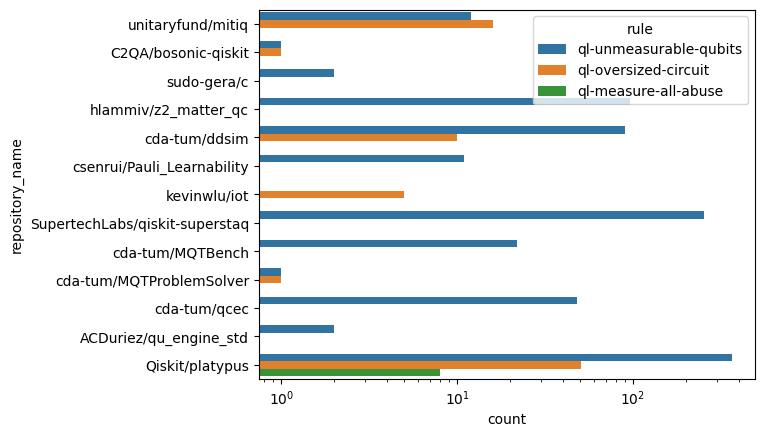

In [10]:
K_warnings = 1000
# sort by the most recent timestamp
df_warnings_plus_metadata_plus_repo_info = df_warnings_plus_metadata_plus_repo_info.sort_values(by=['timestamp'], ascending=False)
# pick repositories in the top 100 warnings
df_selection = df_warnings_plus_metadata_plus_repo_info.head(K_warnings)
sns.countplot(
    hue="rule",
    y="repository_name", data=df_selection)
plt.xscale('log')
repos_in_top_K = df_selection['repository_name'].unique()
print(repos_in_top_K)
unique_ids_in_top_K = df_selection['unique_id'].unique()
df_warnings_plus_metadata_plus_repo_info.head(5)
print(unique_ids_in_top_K)

In [11]:
# 08_c50734_412 >> qiskit_c50734 
from qiskit import QuantumCircuit
qc = QuantumCircuit(5,5)
qc.x(0)
for q in range(4):
    qc.cx(0,q+1)
qc.measure_all()
qc.draw()

┌───┐                     ░ ┌─┐            
   q_0: ┤ X ├──■────■────■────■───░─┤M├────────────
        └───┘┌─┴─┐  │    │    │   ░ └╥┘┌─┐         
   q_1: ─────┤ X ├──┼────┼────┼───░──╫─┤M├─────────
             └───┘┌─┴─┐  │    │   ░  ║ └╥┘┌─┐      
   q_2: ──────────┤ X ├──┼────┼───░──╫──╫─┤M├──────
                  └───┘┌─┴─┐  │   ░  ║  ║ └╥┘┌─┐   
   q_3: ───────────────┤ X ├──┼───░──╫──╫──╫─┤M├───
                       └───┘┌─┴─┐ ░  ║  ║  ║ └╥┘┌─┐
   q_4: ────────────────────┤ X ├─░──╫──╫──╫──╫─┤M├
                            └───┘ ░  ║  ║  ║  ║ └╥┘
   c: 5/═════════════════════════════╬══╬══╬══╬══╬═
                                     ║  ║  ║  ║  ║ 
meas: 5/═════════════════════════════╩══╩══╩══╩══╩═
                                     0  1  2  3  4

In [11]:
# 06_fe6009_63
from qiskit import QuantumCircuit

def inefficientNOT(inefficiencies, inp, layout = [0], n_times = 100):
    """
    This NOT gate includes an int number of inefficiencies, which determines 
    how many qc.x gates the NOT will apply. Note that inefficiencies
    should always be an odd number for the gate to function as a not
    
    """
    qc = QuantumCircuit(1, 1) # A quantum circuit with a single qubit and a single classical bit
    qc.reset(0)
    
    if inp=='1':
        qc.x(0)
    
    qc.barrier()
    """We apply a predefined number of inefficiencies.
    Unfortunately, and contrary to our expectations, this did not yield a decreased
    accuracy result when running on a quantum computer. For the inefficiency-reduced accuracy,
    we will use the NOT() function instead"""
    for i in range(inefficiencies):
        print(i+1, "x gates have been added")
        qc.x(0)
    #barrier between gate operation and measurement
    qc.barrier()
    qc.measure(0,0)
    trial = qc.measure(0,0)
    return qc
    


qc = inefficientNOT(
    inefficiencies=4,
    inp='1',
)
qc.draw()


1 x gates have been added
2 x gates have been added
3 x gates have been added
4 x gates have been added


┌───┐ ░ ┌───┐┌───┐┌───┐┌───┐ ░ ┌─┐┌─┐
  q: ─|0>─┤ X ├─░─┤ X ├┤ X ├┤ X ├┤ X ├─░─┤M├┤M├
          └───┘ ░ └───┘└───┘└───┘└───┘ ░ └╥┘└╥┘
c: 1/═════════════════════════════════════╩══╩═
                                          0  0

In [12]:
from qiskit import transpile, execute, Aer
backend = Aer.get_backend('qasm_simulator')
qc_trans = transpile(qc, backend, optimization_level=3)
job = execute(qc_trans, backend, shots=1024)
output = job.result().get_counts()
print(output)

{'1': 1024}
